## UNDERSTANDING SEQUENTIAL MODEL'S RNN, LSTM & BASIC IMPLEMENTATION

In [16]:
#imports

from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np

# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
display(Markdown("## UNDERSTANDING RECURRENT NEURAL NETWORKS"))

print ("""
RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    
""")

## UNDERSTANDING RECURRENT NEURAL NETWORKS


RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    



In [10]:
display(Markdown("## NUMPY IMPLEMENTATION OF RECURRENT NEURAL NETWORKS"))

timesteps = 100  # Number of timesteps in the input sequence
inputs_features = 32  # Dimensionality of the input feature space
output_features = 64  # Dimensionality of the output feature space


# This is our input data - just random noise for the sake of our example.
inputs = np.random.random((timesteps, inputs_features))
# This is our "initial state": an all-zero vector.
state_t = np.zeros((output_features,))



print ("Raw data\n")
print("Shape of input data: {}".format(inputs.shape))
print ("first 2 timestamps data \n{}\n".format(inputs[:2]))
print("Expected output shape/timestamp: {}".format(state_t.shape))
print ("Random initial output state \n{}\n".format(state_t))

# Creating random weight matrices
W = np.random.random((output_features, inputs_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:  # input_t is a vector of shape (input_features,)
    # We combine the input with the current state
    # (i.e. the previous output) to obtain the current output.
    
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    # We store this output in a list.
    successive_outputs.append(output_t)
    
    # We update the "state" of the network for the next timestep
    state_t = output_t
    


display(Markdown("### result"))

# The final output is a 2D tensor of shape (timesteps, output_features).
# final_output_sequence = np.concatenate(successive_outputs, axis=0)
final_output_sequence = np.reshape(successive_outputs, (timesteps,output_features))

print ("We have a {} dimension vector for each time-step of input sequence\n".format(final_output_sequence.shape[1]))
print (final_output_sequence)

print ("""
Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)
""")

## NUMPY IMPLEMENTATION OF RECURRENT NEURAL NETWORKS

Raw data

Shape of input data: (100, 32)
first 2 timestamps data 
[[0.27592385 0.72894211 0.03599346 0.92322249 0.00794755 0.98331935
  0.69407542 0.0586693  0.06637979 0.27789378 0.51585338 0.00325667
  0.90317277 0.57116882 0.24121566 0.64105797 0.97053364 0.83762517
  0.01441893 0.47993864 0.72854565 0.56255475 0.93081124 0.84045122
  0.3285138  0.14724177 0.07990898 0.4026298  0.98645396 0.13911373
  0.66763828 0.68428558]
 [0.63772173 0.65476873 0.11449802 0.9071212  0.09317165 0.68358939
  0.49549971 0.03327695 0.90736899 0.35035601 0.36230129 0.1201081
  0.6966637  0.8039649  0.65985955 0.59447943 0.68836892 0.74462949
  0.68967092 0.77016202 0.04895765 0.14899816 0.55779603 0.20478825
  0.6121378  0.12386328 0.98933522 0.74035245 0.71293392 0.8068365
  0.07374322 0.5391325 ]]

Expected output shape/timestamp: (64,)
Random initial output state 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### result

We have a 64 dimension vector for each time-step of input sequence

[[0.99999999 0.99999995 0.99999999 ... 0.99999983 0.99999956 0.99999963]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]

Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)



In [20]:
display(Markdown("### implementing above model using keras SimpleRNN layer"))

model = Sequential()
model.add(SimpleRNN(64,return_sequences=True,input_shape=(100,32),name="rnn_layer"))
model.summary()

print ("""
Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.
""")

### implementing above model using keras SimpleRNN layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 6,208
Trainable params: 6,208
Non-trainable params: 0
_________________________________________________________________

Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.



In [12]:
display(Markdown("### Using SimpleRNN and returning the last state"))

#embedding layer initializations
n_vocab_embedding_layer = 10000
size_of_word_vector = 32

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector , input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, name = "rnn_layer"))
model.summary()


display(Markdown("### Using SimpleRNN and returning the full state sequence"))

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector, input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, return_sequences=True, name = "rnn_layer"))
model.summary()

print ("""
"return_sequences" parameter decides if the output is produced at each stage or final output is produced 
""")

### Using SimpleRNN and returning the last state

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 64)                6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________


### Using SimpleRNN and returning the full state sequence

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________

"return_sequences" parameter decides if the output is produced at each stage or final output is produced 



In [13]:
def plot_model_training_history(history):
    
    #collecting all post-training values 
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # ploting losses
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    
    # ploting accuracies
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    return

### Training a model including an Embedding layer and a SimpleRNN layer

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review data lables
[1 0]

Note:  
0 : "Negative review"
1 : "Positive review"


starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.6435 - acc: 0.6148 - val_loss: 0.5876 - val_acc: 

### result

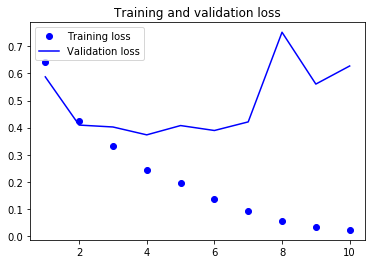

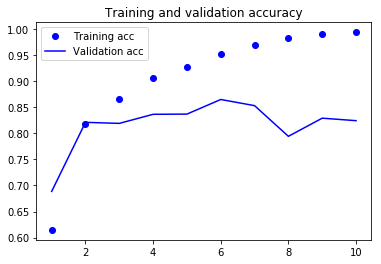

In [14]:
display(Markdown("### Training a model including an Embedding layer and a SimpleRNN layer"))

# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data preparation was extensively cover in "text_pre-processing_basic model_building"(earlier module) ###

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 500
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"

"""
)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

In [ ]:
display(Markdown("## UNDERSTANDING LONG SHORT TERM MEMORY (LSTM)"))

print ("""

    
""")

### Training a model including an Embedding layer and a LSTM layer

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 238s 12ms/step - loss: 0.5143 - acc: 0.7563 - val_loss: 0.3657 - val_acc: 0.8554
Epoch 2/10
20000/20000 [==============================] - 242s 12ms/step - loss: 0.3079 - acc: 0.8797 - val_loss: 0.4125 - val_acc: 0.8134
Epoch 3/10
20000/20000 [====================

### result

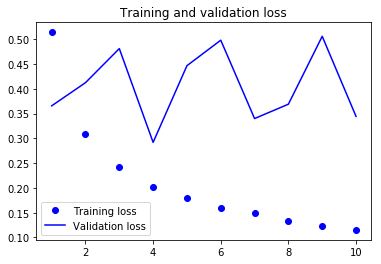

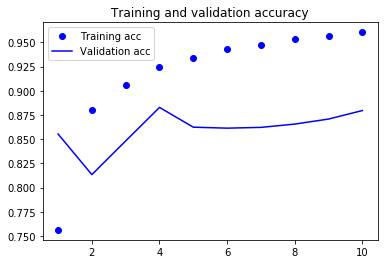

In [18]:
display(Markdown("### Training a model including an Embedding layer and a LSTM layer"))

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)